# **PLQY_all**

_by Felix Eickemeyer_

Evaluation of all absolute PLQY data.

In [1]:
import os
from os import getcwd, listdir
import pandas as pd
import thot
from thot import ThotProject
from importlib import reload

from FTE_analysis_libraries import General as gen
from FTE_analysis_libraries import PLQY as lqy
from FTE_analysis_libraries import Spectrum as spc

In [2]:
# Initializes Thot project
db = ThotProject( dev_root = r'PLQY_results' )

In [3]:
samples = db.find_assets({'type': 'absolute PL spectrum'})
for idx, sample in enumerate(samples):
    A = sample.metadata["A"]
    PLQY = sample.metadata["PLQY"]    
    print(f'{idx:2}: {sample.name.split("_absolute")[0]}, A = {A:.1e}, PLQY = {PLQY:.1e}')    

 0: 1IE_dev-ctrl, A = 8.4e-01, PLQY = 6.8e-03
 1: 2JG_dev-ctrl, A = 8.7e-01, PLQY = 1.2e-02
 2: 2KD_dev-target, A = 8.6e-01, PLQY = 2.5e-02
 3: 2LGb_dev-ctrl, A = 8.6e-01, PLQY = 5.0e-03
 4: 2LG_dev-ctrl, A = 3.5e+03, PLQY = 6.4e-06
 5: 2OC_dev-ctrl, A = 8.7e-01, PLQY = 3.9e-02
 6: 2OH_dev-target, A = 8.4e-01, PLQY = 2.7e-02
 7: 3AA_dev-target, A = 8.5e-01, PLQY = 2.0e-02
 8: 3LI_dev-target, A = 8.6e-01, PLQY = 1.6e-02
 9: 3MF_dev-target, A = 8.4e-01, PLQY = 8.7e-03


In [4]:
#Select samples and change order
do_this_step = True
if do_this_step or ( not db.dev_mode() ):
    samples = db.find_assets({'type' : 'absolute PL spectrum'})
    #Lin Li
    #order = [idx for idx in range(24)]
    #order.remove(7)
    
    #Shuai
    order = [0, 1, 3, 4, 5, 2, 6, 7, 8, 9]
    
    samples_new = [samples[order[idx]] for idx in range(len(order))]
    for idx, sample in enumerate(samples_new):
        print(f'{idx:2}: {sample.name}')
    do_this_step = False
else:
    samples_new = samples

 0: 1IE_dev-ctrl_absolute PL spectrum.csv
 1: 2JG_dev-ctrl_absolute PL spectrum.csv
 2: 2LGb_dev-ctrl_absolute PL spectrum.csv
 3: 2LG_dev-ctrl_absolute PL spectrum.csv
 4: 2OC_dev-ctrl_absolute PL spectrum.csv
 5: 2KD_dev-target_absolute PL spectrum.csv
 6: 2OH_dev-target_absolute PL spectrum.csv
 7: 3AA_dev-target_absolute PL spectrum.csv
 8: 3LI_dev-target_absolute PL spectrum.csv
 9: 3MF_dev-target_absolute PL spectrum.csv


In [5]:
samples = samples_new
def load_spectrum(asset):
    return spc.PEL_spectrum.load(os.path.dirname(asset.file), FN = os.path.basename(asset.file), take_quants_and_units_from_file = True)
sa = []
for idx, sample in enumerate(samples):
    sa.append(load_spectrum(sample))
    print(f'{idx:2}: {sample.name}')

 0: 1IE_dev-ctrl_absolute PL spectrum.csv
 1: 2JG_dev-ctrl_absolute PL spectrum.csv
 2: 2LGb_dev-ctrl_absolute PL spectrum.csv
 3: 2LG_dev-ctrl_absolute PL spectrum.csv
 4: 2OC_dev-ctrl_absolute PL spectrum.csv
 5: 2KD_dev-target_absolute PL spectrum.csv
 6: 2OH_dev-target_absolute PL spectrum.csv
 7: 3AA_dev-target_absolute PL spectrum.csv
 8: 3LI_dev-target_absolute PL spectrum.csv
 9: 3MF_dev-target_absolute PL spectrum.csv


1IE_dev-ctrl   : A = 8.4e-01, PLQY = 6.8e-03, PF = 1.2e+19 1/(s m2)
2JG_dev-ctrl   : A = 8.7e-01, PLQY = 1.2e-02, PF = 2.1e+19 1/(s m2)
2LGb_dev-ctrl  : A = 8.6e-01, PLQY = 5.0e-03, PF = 8.6e+18 1/(s m2)
2LG_dev-ctrl   : A = 3.5e+03, PLQY = 6.4e-06, PF = 1.1e+16 1/(s m2)
2OC_dev-ctrl   : A = 8.7e-01, PLQY = 3.9e-02, PF = 6.7e+19 1/(s m2)
2KD_dev-target : A = 8.6e-01, PLQY = 2.5e-02, PF = 4.2e+19 1/(s m2)
2OH_dev-target : A = 8.4e-01, PLQY = 2.7e-02, PF = 4.8e+19 1/(s m2)
3AA_dev-target : A = 8.5e-01, PLQY = 2.0e-02, PF = 3.5e+19 1/(s m2)
3LI_dev-target : A = 8.6e-01, PLQY = 1.6e-02, PF = 2.8e+19 1/(s m2)
3MF_dev-target : A = 8.4e-01, PLQY = 8.7e-03, PF = 1.5e+19 1/(s m2)


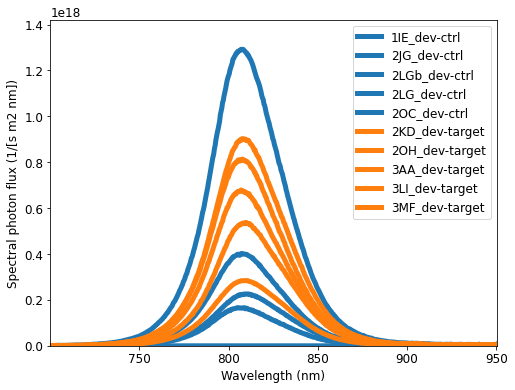

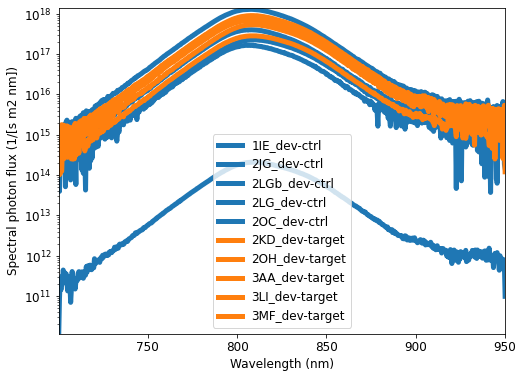

In [6]:
allPL = spc.PEL_spectra(sa)
allPL.names_to_label()

new_labels = []
strlen = int(max([len(samples[idx].name.split('_absolute')[0]) for idx in range(len(samples))]))
for idx in range(len(samples)):
    allPL.sa[idx].plotstyle = dict(color = gen.colors[idx], linewidth = 5, linestyle = '-')
    sm = samples[idx].metadata
    A = sm['A']
    PLQY = sm['PLQY']
    s_name = samples[idx].name.split('_absolute')[0]
    new_labels.append(s_name)
    PF = allPL.sa[idx].photonflux(start = 700, stop = 900)
    print(f'{s_name.ljust(strlen+1)}: A = {A:.1e}, PLQY = {PLQY:.1e}, PF = {PF:.1e} 1/(s m2)')

change_plotstyle = False
if change_plotstyle:
    allPL.sa[0].plotstyle = dict(color = gen.colors[0], linewidth = 5, linestyle = '-')
    allPL.sa[1].plotstyle = dict(color = gen.colors[0], linewidth = 5, linestyle = '-')
    allPL.sa[2].plotstyle = dict(color = gen.colors[1], linewidth = 5, linestyle = '-')
    allPL.sa[3].plotstyle = dict(color = gen.colors[1], linewidth = 5, linestyle = '-')
    allPL.sa[4].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    allPL.sa[5].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    allPL.sa[6].plotstyle = dict(color = gen.colors[3], linewidth = 5, linestyle = '-')
    allPL.sa[7].plotstyle = dict(color = gen.colors[3], linewidth = 5, linestyle = '-')
    allPL.sa[8].plotstyle = dict(color = gen.colors[4], linewidth = 5, linestyle = '-')
    allPL.sa[9].plotstyle = dict(color = gen.colors[4], linewidth = 5, linestyle = '-')
    allPL.sa[10].plotstyle = dict(color = gen.colors[5], linewidth = 5, linestyle = '-')
    #allPL.sa[11].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    #allPL.sa[12].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    #allPL.sa[13].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    #allPL.sa[14].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    change_plotstyle = False
    
change_plotstyle = True
if change_plotstyle:
    for idx, sp in enumerate(allPL.sa):
        if idx < 5:
            sp.plotstyle = dict(color = gen.colors[0], linewidth = 5, linestyle = '-')
#        elif idx < 12:
#            sp.plotstyle = dict(color = gen.colors[1], linewidth = 5, linestyle = '-')
#        elif idx < 17:
#            sp.plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')            
        else:
            sp.plotstyle = dict(color = gen.colors[1], linewidth = 5, linestyle = '-')            
    change_plotstyle = False


#allPL.label(['s1', 's2', 's3', 's4', 's6'])
allPL.label(new_labels)
all_graph = allPL.plot(bottom = 0, plotstyle = 'individual', figsize = (8, 6), return_fig = True, show_plot = False)
FN_lin = 'all_absolute_PL_spectra_linear.png'
lqy.add_graph(db, FN_lin, all_graph)
all_graph_log = allPL.plot(yscale = 'log', divisor = 1e3, plotstyle = 'individual', figsize = (8, 6), return_fig = True, show_plot = False)
FN_log = 'all_absolute_PL_spectra_semilog.png'
lqy.add_graph(db, FN_log, all_graph_log)
#del all_graph
#del all_graph_log


In [7]:
names = []
A_arr = []
PLQY_arr = []
peak_arr = []
Eg_arr = []
Vsq_arr = []
dV_arr = []
QFLS_arr = []
adj_fac_arr = []
fs_absint_fac_arr = []
for sample in samples:
    #print(sample.name.split('_absolute')[0])
    sm = sample.metadata
    #print(sm)
    names.append(sample.name.split('_absolute')[0])
    A_arr.append(sm['A'])
    PLQY_arr.append(sm['PLQY'])
    peak_arr.append(sm['Peak'])
    Eg_arr.append(sm['Eg'])
    Vsq_arr.append(sm['Vsq'])
    dV_arr.append(sm['dV'])
    QFLS_arr.append(sm['QFLS'])
    adj_fac_arr.append(sm['adj_fac'])
    fs_absint_fac_arr.append(sm['fs_absint_factor'])    

In [8]:
# Save PLQY data
do_this_step = True

if do_this_step:

    df = pd.DataFrame({'Sample' : names, 'A' : A_arr, 'PLQY' : PLQY_arr, 'PL_peak (nm)' : peak_arr, 'Eg (eV)' : Eg_arr, 'Vsq (V)' : Vsq_arr, 'delta V (V)': dV_arr, 'QFLS/q (V)' : QFLS_arr, 'fs-inb adjustment factor' : adj_fac_arr, 'fs-absolute intensity factor' : fs_absint_fac_arr})

    directory = os.path.dirname(samples[0].file) 
    FN = 'PLQY.csv'
    #if save_ok(join(directory, FN)):
    #    df.to_csv(join(directory, FN), header = True, index = False)
        
    asset_prop = dict(name = 'csv_'+FN, type = 'csv', file = FN)
    asset_filepath = db.add_asset(asset_prop)
    df.to_csv(asset_filepath, header = True, index = False)
    do_this_step = False

In [10]:
#Save all data in exchange folder
exch_dir = os.path.join(db.root, 'exchange')

try:
    os.makedirs(exch_dir, exist_ok = True)
except OSError as error:
    print("Directory '%s' can not be created" % exch_dir)
    
import shutil

# PLQY.csv
src = asset_filepath
FN = os.path.basename(asset_filepath)
dst =  os.path.join(exch_dir, FN)
shutil.copyfile(src, dst)

# absolute PL spectra
for idx, sample in enumerate(samples):
    src = sample.file
    FN = os.path.basename(sample.file)
    dst =  os.path.join(exch_dir, FN)
    shutil.copyfile(src, dst)
    
# all graph linear and semilog
filepath = os.path.join(exch_dir, FN_lin)
all_graph.savefig(filepath)

filepath = os.path.join(exch_dir, FN_log)
all_graph_log.savefig(filepath)
